<a href="https://colab.research.google.com/github/rldckd0103/pdm02/blob/master/py-tensorflow/cifar10_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170500096/170498071 [==============================] - 2s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

33917


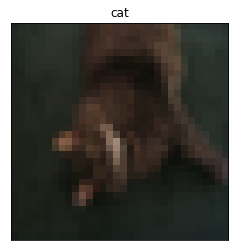

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

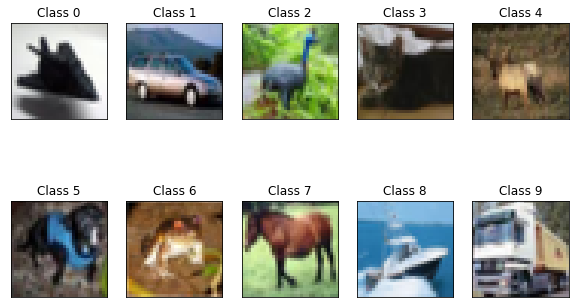

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [ ]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5090 - accuracy: 0.4545 - val_loss: 1.1979 - val_accuracy: 0.5805
Epoch 2/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1757 - accuracy: 0.5826 - val_loss: 1.0356 - val_accuracy: 0.6355
Epoch 3/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0418 - accuracy: 0.6335 - val_loss: 0.9883 - val_accuracy: 0.6556
Epoch 4/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9510 - accuracy: 0.6654 - val_loss: 0.9092 - val_accuracy: 0.6852
Epoch 5/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8826 - accuracy: 0.6889 - val_loss: 0.8748 - val_accuracy: 0.6917
Epoch 6/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8104 - accuracy: 0.7118 - val_loss: 0.8431 - val_accuracy: 0.7016
Epoch 7/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7615 - accuracy: 0.7281 - val_loss: 0.8735 - val_ac

In [ ]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 1.6065 - accuracy: 0.6949


[1.6065300703048706, 0.6948999762535095]

## **CNN2 + FCN3**

In [ ]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c2f3.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5639 - accuracy: 0.4295 - val_loss: 1.2319 - val_accuracy: 0.5638
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2061 - accuracy: 0.5738 - val_loss: 1.0416 - val_accuracy: 0.6308
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0658 - accuracy: 0.6254 - val_loss: 0.9653 - val_accuracy: 0.6670
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9790 - accuracy: 0.6573 - val_loss: 0.9642 - val_accuracy: 0.6622
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9097 - accuracy: 0.6830 - val_loss: 0.8957 - val_accuracy: 0.6919
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8480 - accuracy: 0.7046 - val_loss: 0.8663 - val_accuracy: 0.7015
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8017 - accuracy: 0.7201 - val_loss: 0.8841 - val_ac

In [ ]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 1.4054 - accuracy: 0.7054


[1.405439853668213, 0.7053999900817871]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
score1=c2f2.evaluate(X_test, y_test, batch_size = 32)
score2=c2f3.evaluate(X_test, y_test, batch_size = 32)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

313/313 [==============================] - 1s 2ms/step - loss: 1.4054 - accuracy: 0.7054


([1.6065300703048706, 1.405439853668213],
 [0.6948999762535095, 0.7053999900817871])

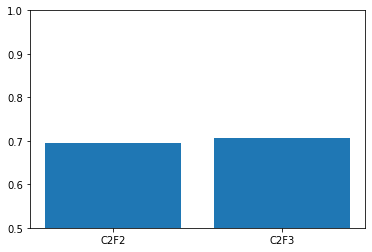

In [ ]:
x = np.arange(2)
cnns = ['C2F2','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Complex model
- C4F5 model

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

In [ ]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c4f5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
c4f5.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7331 - accuracy: 0.3314 - val_loss: 1.3966 - val_accuracy: 0.4716
Epoch 2/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2673 - accuracy: 0.5403 - val_loss: 1.1300 - val_accuracy: 0.5993
Epoch 3/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0590 - accuracy: 0.6311 - val_loss: 0.9907 - val_accuracy: 0.6603
Epoch 4/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9388 - accuracy: 0.6793 - val_loss: 0.9546 - val_accuracy: 0.6813
Epoch 5/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8468 - accuracy: 0.7159 - val_loss: 0.8800 - val_accuracy: 0.7032
Epoch 6/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7801 - accuracy: 0.7400 - val_loss: 0.9727 - val_accuracy: 0.6834
Epoch 7/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7169 - accuracy: 0.7612 - val_loss: 0.8672 -

In [ ]:
 c4f5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 1.1923 - accuracy: 0.7352


[1.1922858953475952, 0.7351999878883362]

## Graph of loss and accuracy
- model: C4f5

In [ ]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epoch = 44
hist = c4f5.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/44
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6608 - accuracy: 0.3695 - val_loss: 1.2661 - val_accuracy: 0.5373
Epoch 2/44
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2240 - accuracy: 0.5677 - val_loss: 1.0392 - val_accuracy: 0.6337
Epoch 3/44
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0268 - accuracy: 0.6462 - val_loss: 1.0165 - val_accuracy: 0.6534
Epoch 4/44
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9153 - accuracy: 0.6900 - val_loss: 0.9215 - val_accuracy: 0.6880
Epoch 5/44
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8201 - accuracy: 0.7250 - val_loss: 0.8902 - val_accuracy: 0.6957
Epoch 6/44
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7525 - accuracy: 0.7500 - val_loss: 0.9397 - val_accuracy: 0.6900
Epoch 7/44
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6958 - accuracy: 0.7698 - val_loss: 0.8759 - val_ac

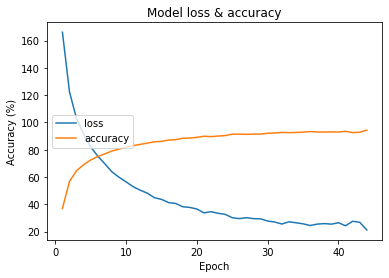

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

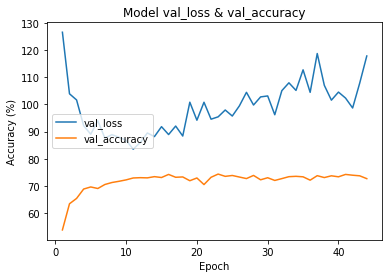

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

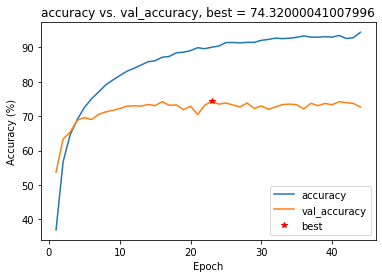

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')


## cifar10 모델 학습
> https://gruuuuu.github.io/machine-learning/cifar10-cnn/#

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
# c4f5.save('fmnist_cnn_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('cifar10_c4f5_best_weights.037-0.7420.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 1.0485 - accuracy: 0.7420


[1.0485432147979736, 0.7419999837875366]

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

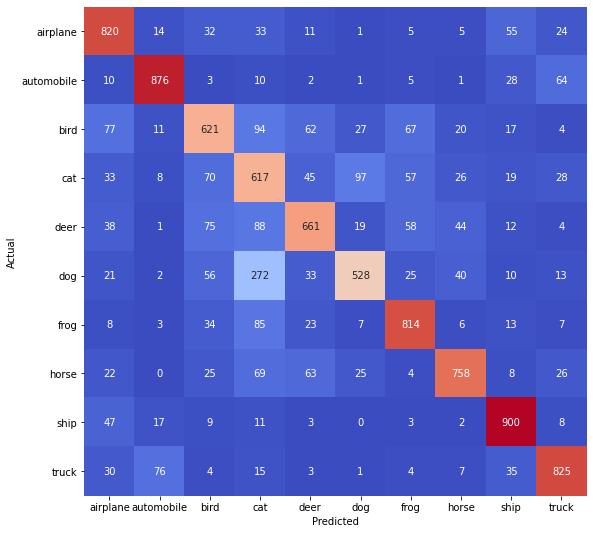

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# State of current scores of cifar-10

> https://paperswithcode.com/sota/image-classification-on-cifar-10

## Transfer learning on cifar-10

- https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245

- https://medium.com/swlh/comparative-analysis-of-cifar-10-image-classification-transfer-learning-vs-user-defined-cnns-e673685d925e

- https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f